# Data Prepare

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, Input, Flatten, Concatenate

# preprocessing (with standard)

In [ ]:
same_wo = pd.read_csv('/content/drive/MyDrive/same_no_outlier_scaling.csv')
int_wo = pd.read_csv('/content/drive/MyDrive/int_no_outlier_scaling.csv')

In [ ]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_wo[boolean_columns] = same_wo[boolean_columns].astype(bool)
int_wo[boolean_columns] = int_wo[boolean_columns].astype(bool)

# Set Index
same_wo.set_index('Date', inplace = True)
int_wo.set_index('Date', inplace = True)

In [ ]:
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

features4_same = ['Lag_1', 'High_Low_Volatility', 'Volume_Momentum', 'Volume_Price_Ratio', 'RSI', 'BB_Low',
                  'SE_Foreign', 'Transaction', 'Open', 'High', 'Low', 'Volume', 'Change']
features4_int = ['Lag_60', 'Lag_1', 'High_Low_Volatility', 'Volume_Momentum', 'Volume_Price_Ratio', 'RSI',
                 'BB_Low', 'BB_High', 'SOX_Close', 'Exchange', 'KR_10', 'US_10', 'SE_Foreign', 'Transaction','Open', 'High', 'Low', 'Volume', 'Change']
target = ['Close']

In [ ]:
x_train_same_wo = same_wo[features][:3519].values
y_train_same_wo = same_wo[target][:3519].values

x_val_same_wo = same_wo[features][3519:4692].values
y_val_same_wo = same_wo[target][3519:4692].values

x_test_same_wo = same_wo[features][4692:].values
y_test_same_wo = same_wo[target][4692:].values

x_scaler_same_wo, y_scaler_same_wo = MinMaxScaler(), MinMaxScaler()

x_train_same_wo = x_scaler_same_wo.fit_transform(x_train_same_wo)
y_train_same_wo = y_scaler_same_wo.fit_transform(y_train_same_wo.reshape(-1, 1))

x_val_same_wo = x_scaler_same_wo.transform(x_val_same_wo)
y_val_same_wo = y_scaler_same_wo.transform(y_val_same_wo.reshape(-1, 1))

x_test_same_wo = x_scaler_same_wo.transform(x_test_same_wo)
y_test_same_wo = y_scaler_same_wo.transform(y_test_same_wo.reshape(-1, 1))

In [ ]:
x_train_int_wo = int_wo[features][:3519].values
y_train_int_wo = int_wo[target][:3519].values

x_val_int_wo = int_wo[features][3519:4692].values
y_val_int_wo = int_wo[target][3519:4692].values

x_test_int_wo = int_wo[features][4692:].values
y_test_int_wo = int_wo[target][4692:].values

x_scaler_int_wo, y_scaler_int_wo = MinMaxScaler(), MinMaxScaler()

x_train_int_wo = x_scaler_int_wo.fit_transform(x_train_int_wo)
y_train_int_wo = y_scaler_int_wo.fit_transform(y_train_int_wo.reshape(-1, 1))

x_val_int_wo = x_scaler_int_wo.transform(x_val_int_wo)
y_val_int_wo = y_scaler_int_wo.transform(y_val_int_wo.reshape(-1, 1))

x_test_int_wo = x_scaler_int_wo.transform(x_test_int_wo)
y_test_int_wo = y_scaler_int_wo.transform(y_test_int_wo.reshape(-1, 1))

feature select

In [ ]:
selected_x_train_same_wo = same_wo[features4_same][:3519].values
selected_y_train_same_wo = same_wo[target][:3519].values

selected_x_val_same_wo = same_wo[features4_same][3519:4692].values
selected_y_val_same_wo = same_wo[target][3519:4692].values

selected_x_test_same_wo = same_wo[features4_same][4692:].values
selected_y_test_same_wo = same_wo[target][4692:].values

x_scaler_selected_same_wo, y_scaler_selected_same_wo = MinMaxScaler(), MinMaxScaler()

selected_x_train_same_wo = x_scaler_selected_same_wo.fit_transform(selected_x_train_same_wo)
selected_y_train_same_wo = y_scaler_selected_same_wo.fit_transform(selected_y_train_same_wo.reshape(-1, 1))

selected_x_val_same_wo = x_scaler_selected_same_wo.transform(selected_x_val_same_wo)
selected_y_val_same_wo = y_scaler_selected_same_wo.transform(selected_y_val_same_wo.reshape(-1, 1))

selected_x_test_same_wo = x_scaler_selected_same_wo.transform(selected_x_test_same_wo)
selected_y_test_same_wo = y_scaler_selected_same_wo.transform(selected_y_test_same_wo.reshape(-1, 1))

In [ ]:
selected_x_train_int_wo = int_wo[features4_int][:3519].values
selected_y_train_int_wo = int_wo[target][:3519].values

selected_x_val_int_wo = int_wo[features4_int][3519:4692].values
selected_y_val_int_wo = int_wo[target][3519:4692].values

selected_x_test_int_wo = int_wo[features4_int][4692:].values
selected_y_test_int_wo = int_wo[target][4692:].values

x_scaler_selected_int_wo, y_scaler_selected_int_wo = MinMaxScaler(), MinMaxScaler()

selected_x_train_int_wo = x_scaler_selected_int_wo.fit_transform(selected_x_train_int_wo)
selected_y_train_int_wo = y_scaler_selected_int_wo.fit_transform(selected_y_train_int_wo.reshape(-1, 1))

selected_x_val_int_wo = x_scaler_selected_int_wo.transform(selected_x_val_int_wo)
selected_y_val_int_wo = y_scaler_selected_int_wo.transform(selected_y_val_int_wo.reshape(-1, 1))

selected_x_test_int_wo = x_scaler_selected_int_wo.transform(selected_x_test_int_wo)
selected_y_test_int_wo = y_scaler_selected_int_wo.transform(selected_y_test_int_wo.reshape(-1, 1))

# Model Setting

In [ ]:
!pip install tensorflow

In [ ]:
# GPU가 사용 가능한지 확인
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # 첫 번째 GPU 메모리를 다 사용할 수 있도록 설정 (필요에 따라 조정 가능)
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is set to be used.")
    except RuntimeError as e:
        print(f"Error setting GPU memory growth: {e}")
else:
    print("No GPU found. Using CPU instead.")

GPU is set to be used.


In [ ]:
def create_sequences(X, y, time_steps):
    sequences, labels = [], []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:i + time_steps])
        labels.append(y[i + time_steps])
    return np.array(sequences), np.array(labels)

In [ ]:
time_steps = config["time_steps"]

# 기존 2D 데이터를 시퀀스 데이터로 변환
X_train, y_train = create_sequences(x_train_same_wo, y_train_same_wo, time_steps)
X_val, y_val = create_sequences(x_val_same_wo, y_val_same_wo, time_steps)

# 출력 데이터 크기 확인
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (3489, 30, 45), y_train shape: (3489, 1)
X_val shape: (1143, 30, 45), y_val shape: (1143, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        self.V = self.add_weight(name='attention_score', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)

    def call(self, inputs):
        # Attention mechanism
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.V, axes=1), axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

In [ ]:
class MultiHeadAttentionLayer(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(MultiHeadAttentionLayer, self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)

    def call(self, query, value):
        return self.attention(query=query, value=value, key=value)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터할 지표 (예: 'val_loss' 또는 'val_rmse')
    patience=5,          # 성능 향상이 없는 epoch 수 (5번 동안 개선 없으면 중단)
    restore_best_weights=True,  # 가장 성능이 좋은 가중치를 복원
    mode = 'min'
    #verbose=1            # 로그 출력 여부
)

# Same

##### base

Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0647 - mse: 0.0647 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.7080e-04 - mse: 8.7080e-04 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.1917e-04 - mse: 5.1917e-04 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2576e-04 - mse: 4.2576e-04 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2878e-04 - mse: 3.2878e-04 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8967e-04 - mse: 2.8967e-04 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1629e-04 - mse: 3.1629e-04 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3468e-04 - mse: 2.3468e-04 - val_loss: 0.0417 - val_mse: 0.041

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 64)              │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,749 (717.77 KB)

 Trainable params: 61,249 (239.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122,500 (478.52 KB)

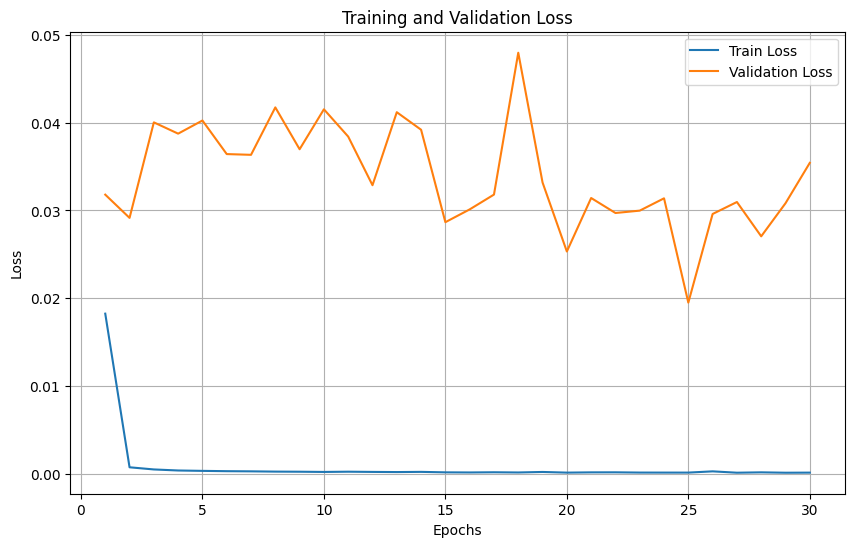

In [ ]:
# 모델 구성
config = {
    "epochs": 30,
    "batch_size": 32,
    "time_steps": 30,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse"
}

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Colab Notebooks/lstm_model_path/same_initial.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)
model_same_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(config["lstm_units"][0], activation='tanh', input_shape=(time_steps, X_train.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(config["lstm_units"][1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_same_init.compile(optimizer=config["optimizer"], loss=config["loss"], metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(config["epochs"]):
    print(f"Epoch {epoch + 1}/{config['epochs']}")
    history = model_same_init.fit(
        X_train, y_train,
        epochs=1,
        batch_size=config["batch_size"],
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
            model_checkpoint
        ]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

# 모델 요약
model_same_init.summary()

# 손실 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, config["epochs"] + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, config["epochs"] + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

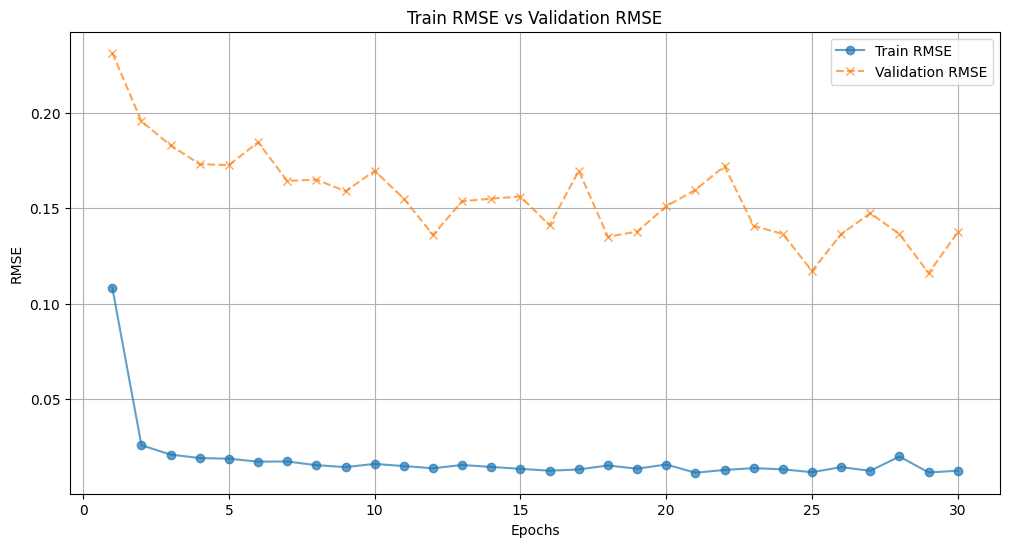

In [ ]:
import numpy as np

# RMSE 계산
train_rmse = np.sqrt(train_loss_history)
val_rmse = np.sqrt(val_loss_history)

# RMSE Plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_rmse, label='Train RMSE', marker='o', linestyle='-', alpha=0.7)
plt.plot(epochs, val_rmse, label='Validation RMSE', marker='x', linestyle='--', alpha=0.7)
plt.title('Train RMSE vs Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


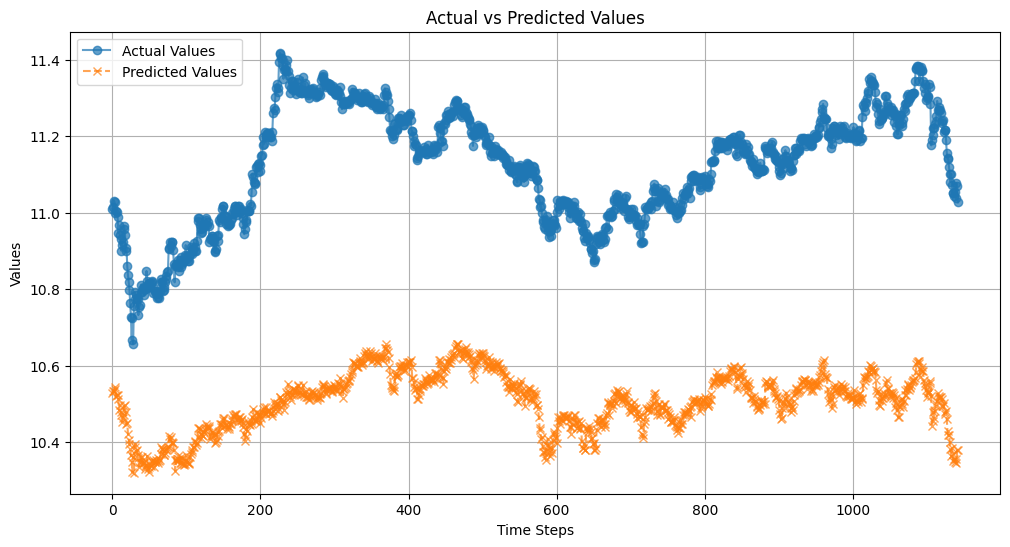

In [ ]:
y_pred = model_same_init.predict(X_test)

# 적절한 스케일러 사용 (이전에 정의된 y_scaler_same_wo 사용)
y_pred = y_scaler_same_wo.inverse_transform(y_pred)
y_test = y_scaler_same_wo.inverse_transform(y_test)

# Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

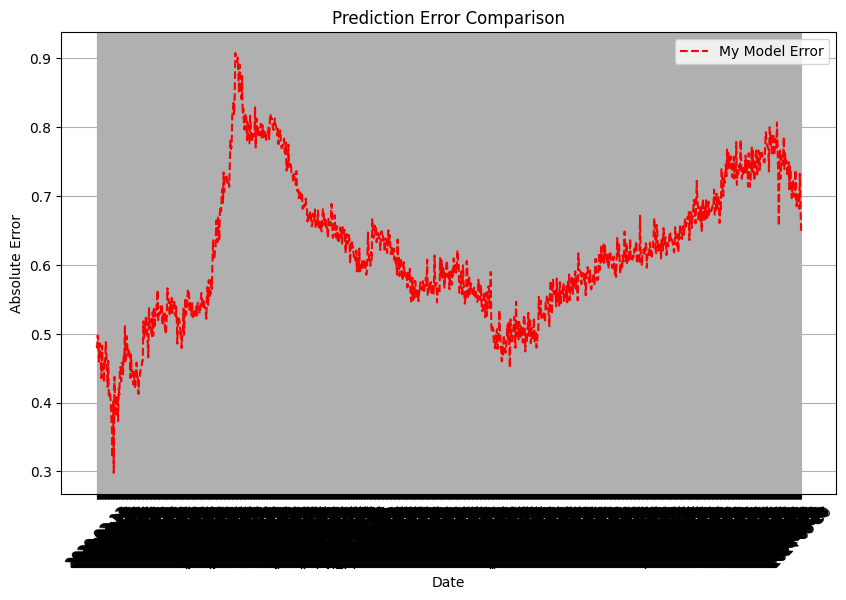

In [ ]:
dates = same_wo.index[4692 + config["time_steps"]:]  # 인덱스 정의 수정
diff_my = abs(y_test - y_pred)
plt.figure(figsize=(10, 6))
plt.plot(dates, diff_my, label="My Model Error", color='red', linestyle='--')
plt.title("Prediction Error Comparison")
plt.xlabel("Date")
plt.ylabel("Absolute Error")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 1

# 2

Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0726 - val_mse: 0.0726
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.7017e-04 - mse: 5.7017e-04 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.7169e-04 - mse: 9.7169e-04 - val_loss: 0.0730 - val_mse: 0.0730
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9825e-04 - mse: 3.9825e-04 - val_loss: 0.0587 - val_mse: 0.0587
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5643e-04 - mse: 4.5643e-04 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8918e-04 - mse: 2.8918e-04 - val_loss: 0.0548 - val_mse: 0.0548
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8451e-04 - mse: 2.8451e-04 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1495e-04 - mse: 5.1495e-04 - val_loss: 0.0366 - val_mse: 0.036

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 30, 64)              │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 196,229 (766.52 KB)

 Trainable params: 65,409 (255.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 130,820 (511.02 KB)

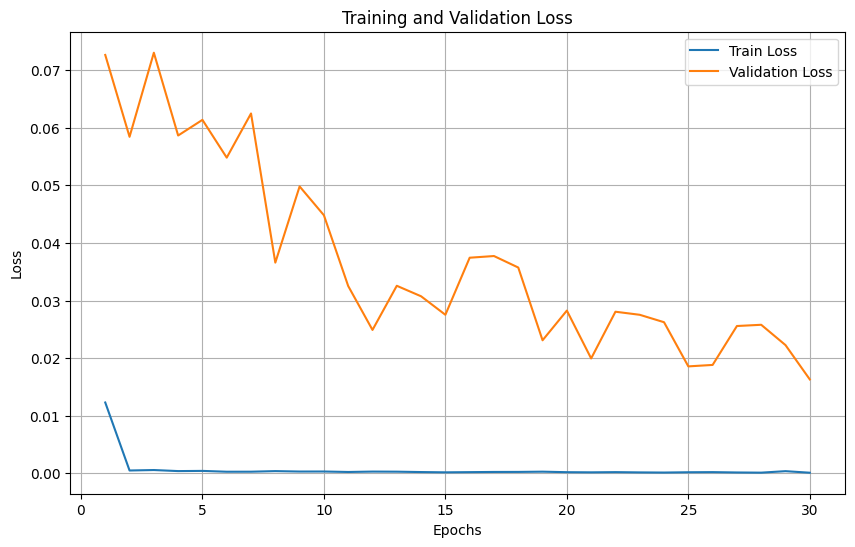

In [ ]:
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper2.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# 모델 정의
model_same_hyper2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(config["lstm_units"][0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(config["lstm_units"][1], activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper2.compile(optimizer=config["optimizer"], loss=config["loss"], metrics=['mse'])

# 학습
train_loss_history = []
val_loss_history = []

for epoch in range(config["epochs"]):
    print(f"Epoch {epoch + 1}/{config['epochs']}")
    history = model_same_hyper2.fit(
        X_train, y_train,
        epochs=1,
        batch_size=config["batch_size"],
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

# 모델 요약
model_same_hyper2.summary()

# 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, config["epochs"] + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, config["epochs"] + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


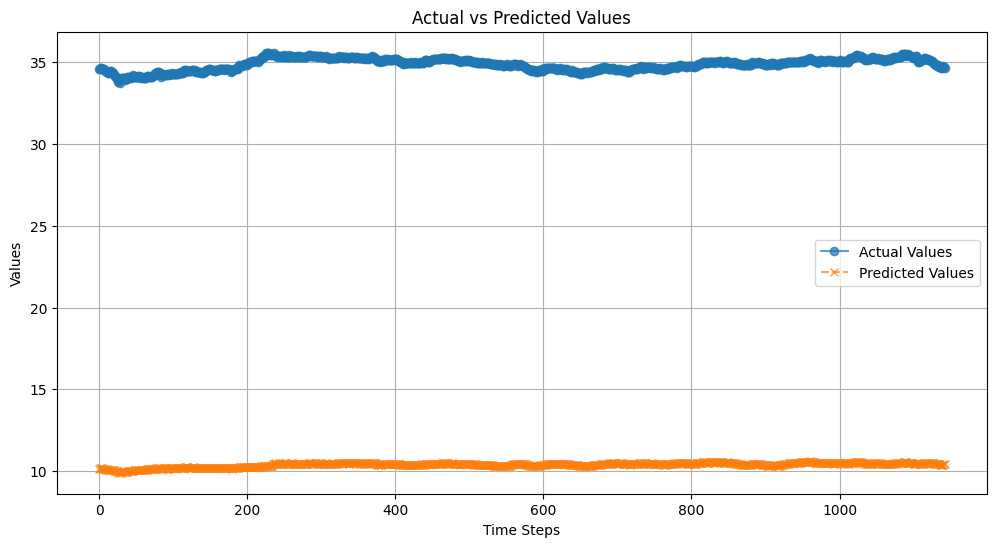

In [ ]:
y_pred = model_same_init.predict(X_test)

# 적절한 스케일러 사용 (이전에 정의된 y_scaler_same_wo 사용)
y_pred = y_scaler_same_wo.inverse_transform(y_pred)
y_test = y_scaler_same_wo.inverse_transform(y_test)

# Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# 3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0718 - mse: 0.0718 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 7.3921e-04 - mse: 7.3921e-04 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.1980e-04 - mse: 4.1980e-04 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3052e-04 - mse: 3.3052e-04 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2212e-04 - mse: 3.2212e-04 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1471e-04 - mse: 3.1471e-04 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8570e-04 - mse: 2.8570e-04 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5921e-04 - mse: 2.5921e-04 - val_loss: 0.0208 - val_mse: 0.02

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 5, 64)               │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 5, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 295,301 (1.13 MB)

 Trainable params: 98,433 (384.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196,868 (769.02 KB)

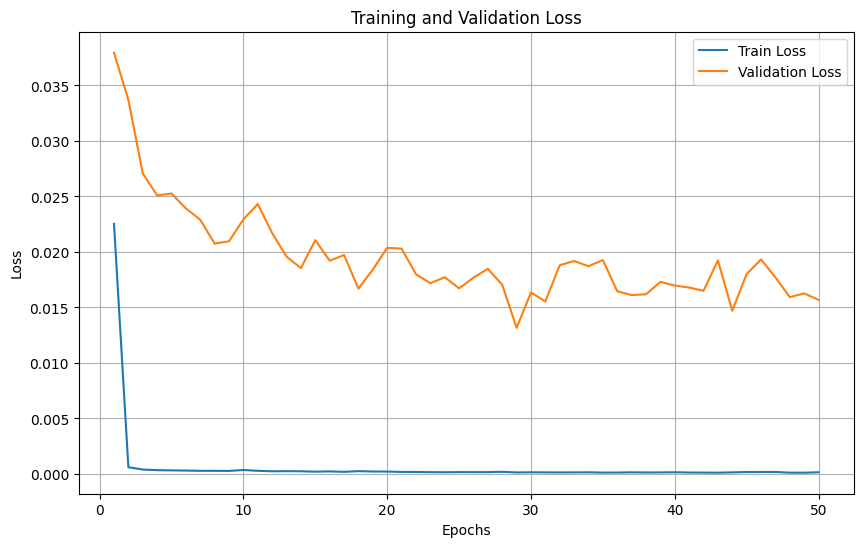

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

# wandb 대신 하드코딩된 설정값 사용
config = {
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [64, 64, 64],
    "optimizer": "adam",
    "loss": "mse"
}

# 기존에 정의된 데이터 준비된 변수 활용
# x_train_same_wo, y_train_same_wo, x_val_same_wo, y_val_same_wo 사용

# 시퀀스 생성 함수
def create_sequences(X, y, time_steps):
    sequences, labels = [], []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:i + time_steps])
        labels.append(y[i + time_steps])
    return np.array(sequences), np.array(labels)

# 시퀀스 데이터 생성
time_steps = config["time_steps"]
X_train, y_train = create_sequences(x_train_same_wo, y_train_same_wo, time_steps)
X_val, y_val = create_sequences(x_val_same_wo, y_val_same_wo, time_steps)

# EarlyStopping 설정
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min'
)

# 체크포인트 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper3.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# 모델 정의
model_same_hyper3 = tf.keras.Sequential([
    tf.keras.layers.LSTM(config["lstm_units"][0], activation='tanh', input_shape=(time_steps, X_train.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(config["lstm_units"][1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(config["lstm_units"][2], activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper3.compile(optimizer=config["optimizer"], loss=config["loss"], metrics=['mse'])

# 학습
train_loss_history = []
val_loss_history = []

for epoch in range(config["epochs"]):
    print(f"Epoch {epoch + 1}/{config['epochs']}")
    history = model_same_hyper3.fit(
        X_train, y_train,
        epochs=1,
        batch_size=config["batch_size"],
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

# 모델 요약
model_same_hyper3.summary()

# 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, config["epochs"] + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, config["epochs"] + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


feature

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1398 - mse: 0.1398 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9621e-04 - mse: 4.9621e-04 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2899e-04 - mse: 3.2899e-04 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8728e-04 - mse: 2.8728e-04 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.5240e-04 - mse: 2.5240e-04 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3384e-04 - mse: 2.3384e-04 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3810e-04 - mse: 2.3810e-04 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.2351e-04 - mse: 2.2351e-04 - val_loss: 0.0063 - val_mse:

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 3, 64)               │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_30 (LSTM)                       │ (None, 1, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_31 (LSTM)                       │ (None, 1, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_32 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 527,237 (2.01 MB)

 Trainable params: 175,745 (686.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 351,492 (1.34 MB)

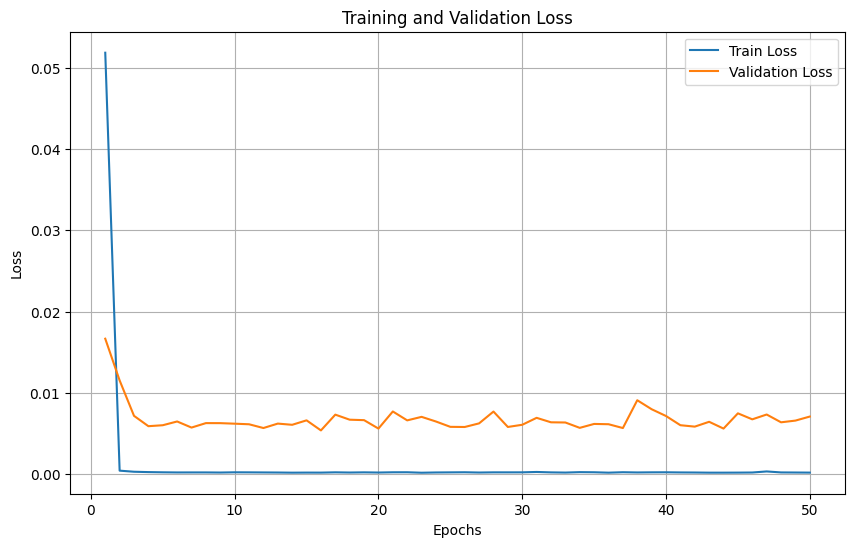

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D
import tensorflow as tf

# 하드코딩된 설정값
config = {
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128, 64, 32],
    "optimizer": "adam",
    "loss": "mse"
}

# 모델 체크포인트 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Colab Notebooks/lstm_model_path/same_feature.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# EarlyStopping 설정
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min'
)

# 시퀀스 데이터 생성 함수
def create_sequences(X, y, time_steps):
    sequences, labels = [], []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:i + time_steps])
        labels.append(y[i + time_steps])
    return np.array(sequences), np.array(labels)

# 데이터 준비
time_steps = config["time_steps"]
X_train, y_train = create_sequences(selected_x_train_same_wo, selected_y_train_same_wo, time_steps)
X_val, y_val = create_sequences(selected_x_val_same_wo, selected_y_val_same_wo, time_steps)

# 모델 정의
model_int_hyper5 = tf.keras.Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(time_steps, X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(config["lstm_units"][0], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(config["lstm_units"][1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(config["lstm_units"][2], activation='tanh'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_int_hyper5.compile(optimizer=config["optimizer"], loss=config["loss"], metrics=['mse'])

# 학습
train_loss_history = []
val_loss_history = []

for epoch in range(config["epochs"]):
    print(f"Epoch {epoch + 1}/{config['epochs']}")
    history = model_int_hyper5.fit(
        X_train, y_train,
        epochs=1,
        batch_size=config["batch_size"],
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

# 모델 요약
model_int_hyper5.summary()

# 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, config["epochs"] + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, config["epochs"] + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


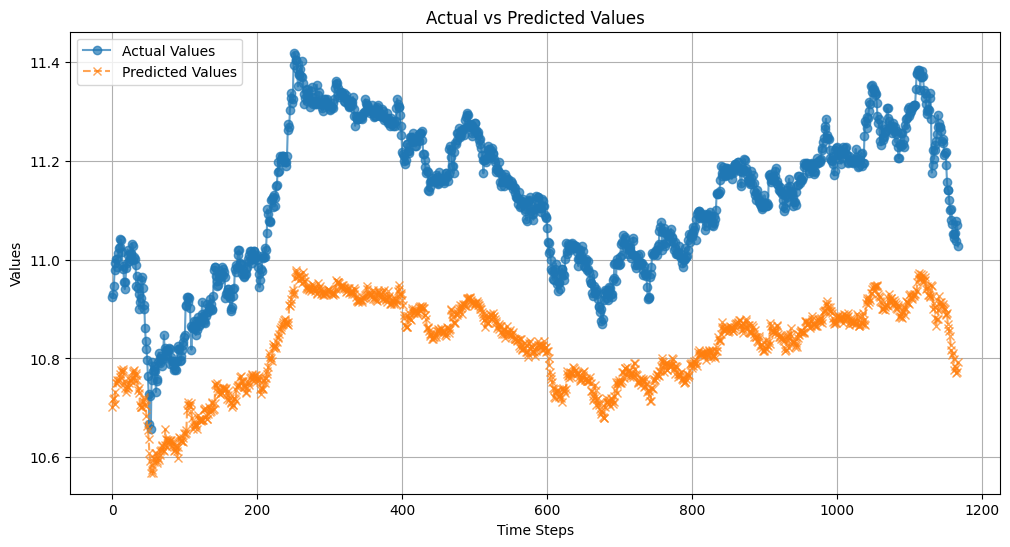

In [ ]:
# 테스트 데이터 준비
time_steps = config["time_steps"]
X_test, y_test = create_sequences(selected_x_test_same_wo, selected_y_test_same_wo, time_steps)

# 모델 예측
y_pred = model_int_hyper5.predict(X_test)

# 역변환 (스케일러를 사용하여 원래 값으로 복원)
y_pred = y_scaler_selected_same_wo.inverse_transform(y_pred)
y_test = y_scaler_selected_same_wo.inverse_transform(y_test)

# 실제 값 vs 예측 값 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# Interpolation

##### 10

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.1444e-04 - mse: 6.1444e-04 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.4424e-04 - mse: 4.4424e-04 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.9982e-04 - mse: 3.9982e-04 - val_loss: 0.0321 - val_mse: 0.0321
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0362e-04 - mse: 3.0362e-04 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8977e-04 - mse: 2.8977e-04 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6803e-04 - mse: 4.6803e-04 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6582e-04 - mse: 2.6582e-04 - val_loss: 0.0279 - val_mse: 0.

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 30, 64)              │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,749 (717.77 KB)

 Trainable params: 61,249 (239.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122,500 (478.52 KB)

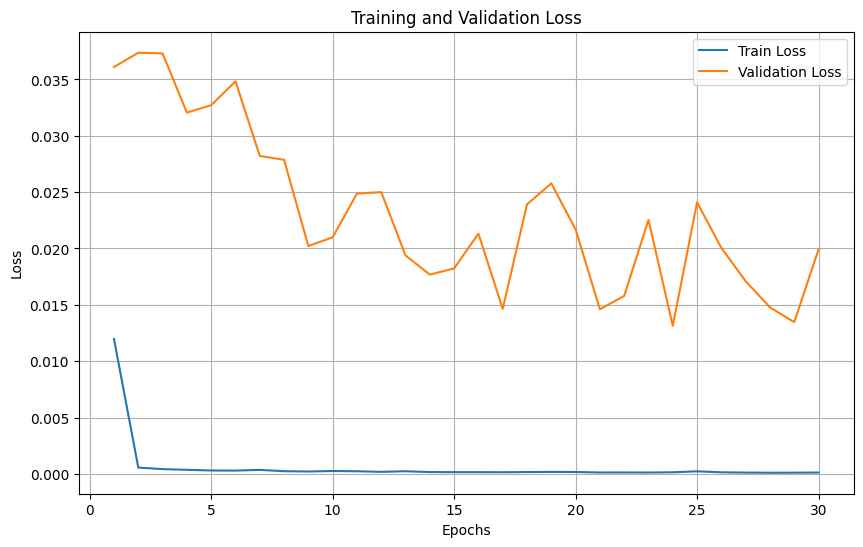

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

# 하드코딩된 설정값
config = {
    "epochs": 30,
    "batch_size": 32,
    "time_steps": 30,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse"
}

# 모델 체크포인트 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Colab Notebooks/lstm_model_path/int_initial.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# EarlyStopping 설정
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min'
)

# 시퀀스 데이터 생성 함수
def create_sequences(X, y, time_steps):
    sequences, labels = [], []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:i + time_steps])
        labels.append(y[i + time_steps])
    return np.array(sequences), np.array(labels)

# 데이터 준비
time_steps = config["time_steps"]
X_train, y_train = create_sequences(x_train_int_wo, y_train_int_wo, time_steps)
X_val, y_val = create_sequences(x_val_int_wo, y_val_int_wo, time_steps)

# 모델 정의
model_int_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(config["lstm_units"][0], activation='tanh', input_shape=(time_steps, X_train.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(config["lstm_units"][1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_int_init.compile(optimizer=config["optimizer"], loss=config["loss"], metrics=['mse'])

# 학습
train_loss_history = []
val_loss_history = []

for epoch in range(config["epochs"]):
    print(f"Epoch {epoch + 1}/{config['epochs']}")
    history = model_int_init.fit(
        X_train, y_train,
        epochs=1,
        batch_size=config["batch_size"],
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

# 모델 요약
model_int_init.summary()

# 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, config["epochs"] + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, config["epochs"] + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.5694e-04 - mse: 6.5694e-04 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0523e-04 - mse: 4.0523e-04 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6905e-04 - mse: 4.6905e-04 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6697e-04 - mse: 2.6697e-04 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4041e-04 - mse: 2.4041e-04 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1046e-04 - mse: 2.1046e-04 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                       │ (None, 30, 64)              │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,749 (717.77 KB)

 Trainable params: 61,249 (239.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122,500 (478.52 KB)

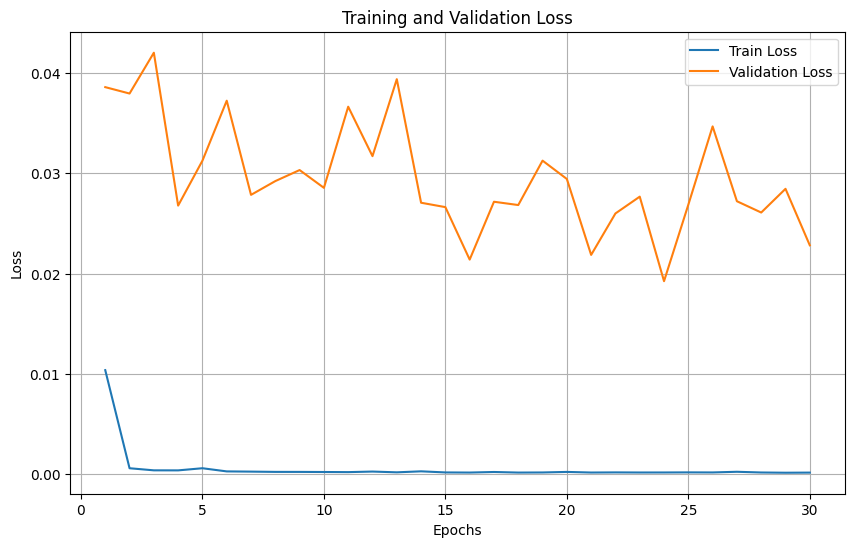

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# wandb 대신 하드코딩된 설정값 사용
config = {
    "epochs": 30,
    "batch_size": 32,
    "time_steps": 30,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse"
}

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Colab Notebooks/lstm_model_path/int_feature.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# 데이터 준비
time_steps = config["time_steps"]
X_train, y_train = create_sequences(x_train_int_wo, y_train_int_wo, time_steps)
X_val, y_val = create_sequences(x_val_int_wo, y_val_int_wo, time_steps)

# 모델 정의
model_int_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(config["lstm_units"][0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(config["lstm_units"][1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_int_init.compile(optimizer=config["optimizer"], loss=config["loss"], metrics=['mse'])

train_loss_history = []
val_loss_history = []

# 학습 반복 및 손실 저장
for epoch in range(config["epochs"]):
    print(f"Epoch {epoch + 1}/{config['epochs']}")
    history = model_int_init.fit(
        X_train, y_train,
        epochs=1,
        batch_size=config["batch_size"],
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

# 모델 요약 출력
model_int_init.summary()

# 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, config["epochs"] + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, config["epochs"] + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


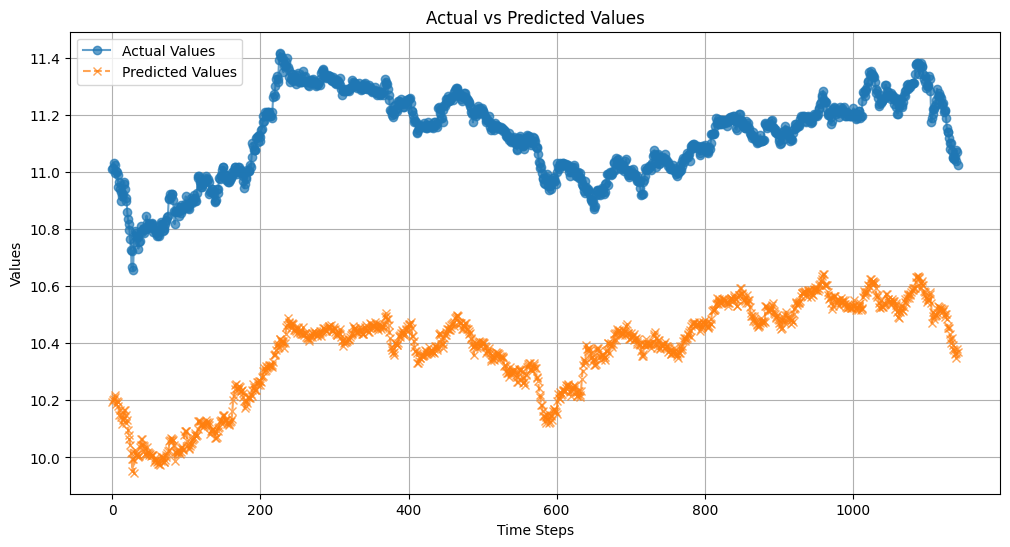

In [ ]:
# 테스트 데이터 준비
time_steps = config["time_steps"]
X_test, y_test = create_sequences(x_test_int_wo, y_test_int_wo, time_steps)

# y_test는 time_steps 이후 데이터를 사용
y_test = y_test_int_wo[time_steps:]

# 모델 예측
y_pred = model_int_init.predict(X_test)

# 역변환 (스케일러를 사용하여 원래 값으로 변환)
y_pred = y_scaler_int_wo.inverse_transform(y_pred)
y_test = y_scaler_int_wo.inverse_transform(y_test)

# 실제 값 vs 예측 값 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


**feature select

int

Epoch 1/50
104/110 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1030 - mse: 0.1030
Epoch 1: val_loss improved from inf to 0.01440, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_10.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0985 - mse: 0.0985 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 2/50
105/110 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3987e-04 - mse: 4.3987e-04
Epoch 1: val_loss improved from 0.01440 to 0.01160, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_10.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.3810e-04 - mse: 4.3810e-04 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.3582e-04 - mse: 3.3582e-04
Epoch 1: val_loss improved from 0.01160 to 0.01158, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_10.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, 5, 128)              │          75,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, 5, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 419,333 (1.60 MB)

 Trainable params: 139,777 (546.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 279,556 (1.07 MB)

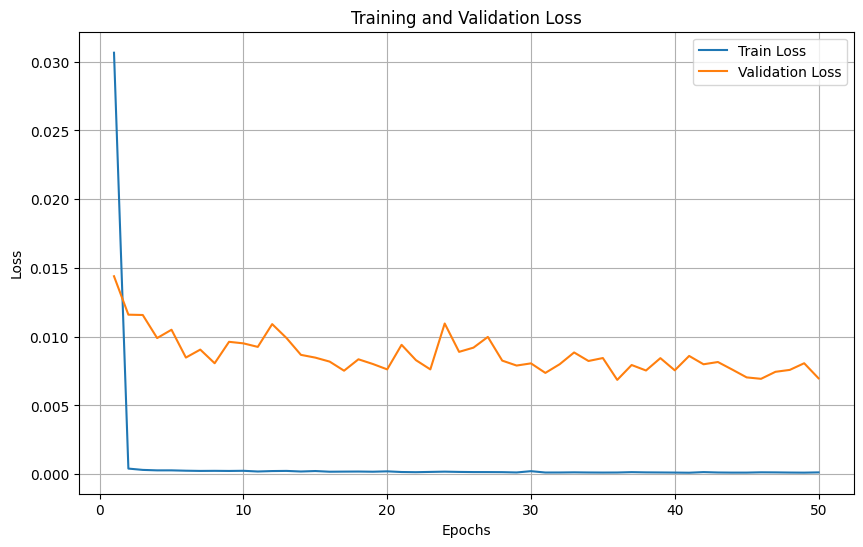

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 설정값
config = {
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128, 64, 32],
    "optimizer": "adam",
    "loss": "mse"
}

# 체크포인트 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_10.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

# EarlyStopping 설정
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min'
)

# 시퀀스 생성 함수
def create_sequences(X, y, time_steps):
    sequences, labels = [], []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:i + time_steps])
        labels.append(y[i + time_steps])
    return np.array(sequences), np.array(labels)

# 데이터 준비
time_steps = config["time_steps"]
X_train, y_train = create_sequences(selected_x_train_int_wo, selected_y_train_int_wo, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_wo, selected_y_val_int_wo, time_steps)

# 모델 정의
model_int_hyper_10 = Sequential([
    LSTM(config["lstm_units"][0], activation='tanh', input_shape=(time_steps, X_train.shape[2]), return_sequences=True),
    LSTM(config["lstm_units"][1], activation='tanh', return_sequences=True),
    LSTM(config["lstm_units"][2], activation='tanh'),
    Dense(64, activation='relu'),
    Dense(1)
])

model_int_hyper_10.compile(optimizer=config["optimizer"], loss=config["loss"], metrics=['mse'])

# 학습
train_loss_history = []
val_loss_history = []

for epoch in range(config["epochs"]):
    print(f"Epoch {epoch + 1}/{config['epochs']}")
    history = model_int_hyper_10.fit(
        X_train, y_train,
        epochs=1,
        batch_size=config["batch_size"],
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

# 모델 요약
model_int_hyper_10.summary()

# 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, config["epochs"] + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, config["epochs"] + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()



37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


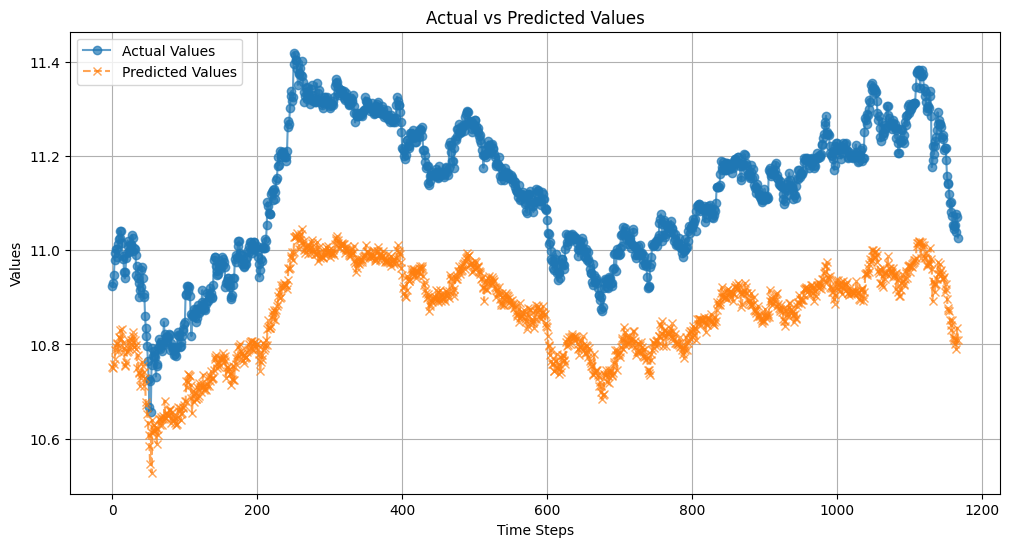

In [ ]:
# 테스트 데이터 준비
time_steps = config["time_steps"]
X_test, y_test = create_sequences(selected_x_test_int_wo, selected_y_test_int_wo, time_steps)

# 모델 예측
y_pred = model_int_hyper_10.predict(X_test)

# 역변환 (스케일러를 사용하여 원래 값으로 복원)
y_pred = y_scaler_selected_int_wo.inverse_transform(y_pred)
y_test = y_scaler_selected_int_wo.inverse_transform(y_test)

# 실제 값 vs 예측 값 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()
